In [2]:
import pandas as pd 
import numpy as np

import matplotlib.pyplot as plt

%matplotlib inline

In [4]:
data = pd.read_csv('Chicago_Crimes_2017.csv')
print(data.shape)
data.head()

(11357, 22)


,ID,CaseNumber,Date,Block,IUCR,PrimaryType,Description,Location Description,Arrest,Domestic,Beat,District,Ward,CommunityArea,FBICode,X Coordinate,Y Coordinate,Year,UpdatedOn,Latitude,Longitude,Location
0,10801165,JA100077,01/01/2017 01:00:00 AM,0000X W DIVISION ST,0460,BATTERY,SIMPLE,BAR OR TAVERN,True,False,1824,18.0,42.0,8.0,08B,NaN,NaN,2017,01/08/2017 03:48:20 PM,NaN,NaN,NaN
1,10801166,JA100115,01/01/2017 01:23:00 AM,084XX S SANGAMON ST,0470,PUBLIC PEACE VIOLATION,RECKLESS CONDUCT,SIDEWALK,True,False,613,6.0,21.0,71.0,24,NaN,NaN,2017,01/08/2017 03:48:20 PM,NaN,NaN,NaN
2,10801090,JA100010,01/01/2017 12:01:00 AM,064XX S STONY ISLAND AVE,1310,CRIMINAL DAMAGE,TO PROPERTY,RESIDENCE,False,False,314,3.0,5.0,42.0,14,NaN,NaN,2017,01/08/2017 03:48:20 PM,NaN,NaN,NaN
3,10801101,JA100031,01/01/2017 12:00:00 AM,074XX S SOUTH CHICAGO AVE,1320,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,324,3.0,5.0,69.0,14,NaN,NaN,2017,01/08/2017 03:48:20 PM,NaN,NaN,NaN
4,10801104,JA100015,01/01/2017 12:00:00 AM,004XX W 66TH ST,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,True,722,7.0,20.0,68.0,08B,NaN,NaN,2017,01/08/2017 03:48:20 PM,NaN,NaN,NaN


In [8]:
data['PrimaryType'].value_counts()

THEFT                                2493
BATTERY                              1974
CRIMINAL DAMAGE                      1305
OTHER OFFENSE                         874
ASSAULT                               774
MOTOR VEHICLE THEFT                   712
BURGLARY                              667
DECEPTIVE PRACTICE                    652
ROBBERY                               613
NARCOTICS                             411
CRIMINAL TRESPASS                     317
WEAPONS VIOLATION                     177
OFFENSE INVOLVING CHILDREN             96
CRIM SEXUAL ASSAULT                    64
PUBLIC PEACE VIOLATION                 54
INTERFERENCE WITH PUBLIC OFFICER       47
PROSTITUTION                           32
HOMICIDE                               31
SEX OFFENSE                            20
ARSON                                  13
STALKING                                7
KIDNAPPING                              6
INTIMIDATION                            6
CONCEALED CARRY LICENSE VIOLATION 

In [24]:
data['Date'] = pd.to_datetime(data['Date'], dayfirst=True)

In [25]:
data['Month'] = data['Date'].dt.month

In [26]:
crimes_by_month = data.groupby('Month').size()

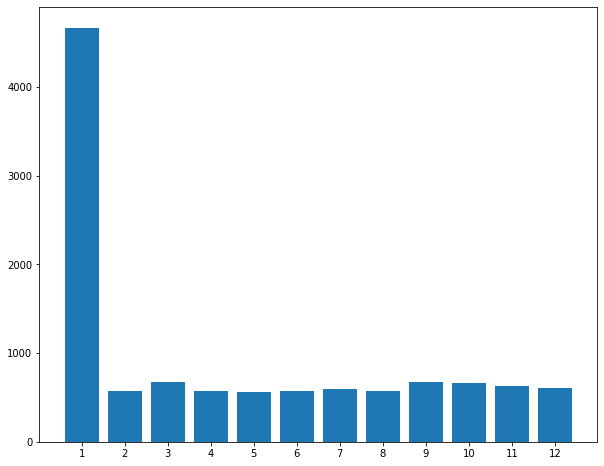

In [28]:
fig, ax = plt.subplots(figsize=(10,8))
ax.bar(crimes_by_month.index,crimes_by_month.values)
ax.set_xticks(crimes_by_month.index.values);

In [37]:
crime_battery = data[data['PrimaryType'] == 'BATTERY'].groupby('Month').size()

crime_battery

Month
1     852
2     106
3     114
4      93
5      84
6      82
7     120
8     115
9      89
10    106
11    120
12     93
dtype: int64

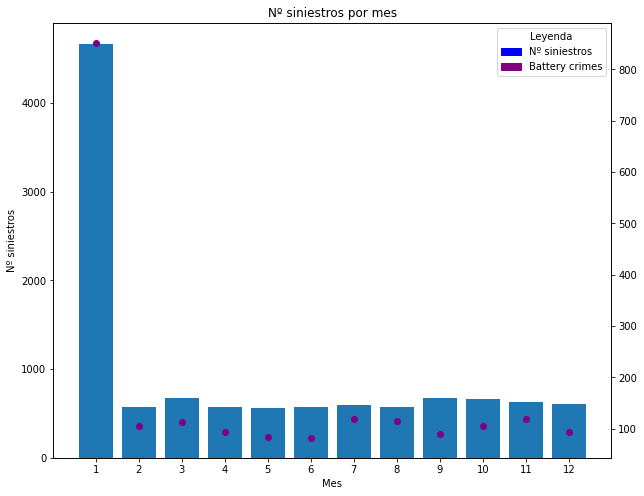

In [46]:
fig, ax = plt.subplots(figsize=(10,8))
ax.bar(crimes_by_month.index,crimes_by_month.values)
ax.set_xticks(crimes_by_month.index.values);
ax.set_title("Nº siniestros por mes")
ax.set_ylabel("Nº siniestros")
ax.set_xlabel('Mes')


ax1 = ax.twinx()

ax1.scatter(crime_battery.index.values,crime_battery.values,c="purple", label = 'Battery Crimes');
import matplotlib.patches as mpatches

bar = mpatches.Patch(color='blue', label='Nº siniestros')
point = mpatches.Patch(color='purple', label='Battery crimes')
plt.legend(handles=[bar, point], title = 'Leyenda')


In [56]:
df = data.query('PrimaryType in ("THEFT", "BATTERY", "CRIMINAL DAMAGE", "OTHER OFFENSE")')

vc = df['PrimaryType'].value_counts(normalize = True)
vc

THEFT              0.375113
BATTERY            0.297021
CRIMINAL DAMAGE    0.196359
OTHER OFFENSE      0.131508
Name: PrimaryType, dtype: float64

In [66]:
num = df.groupby(by=['PrimaryType', 'Month']).size().unstack().T
num

PrimaryType,BATTERY,CRIMINAL DAMAGE,OTHER OFFENSE,THEFT
Month,,,,
1,852,538,328,1055
2,106,72,42,112
3,114,81,44,132
4,93,54,47,156
5,84,67,50,122
6,82,68,40,118
7,120,59,42,114
8,115,68,56,103
9,89,88,48,152


Index(['BATTERY', 'CRIMINAL DAMAGE', 'OTHER OFFENSE', 'THEFT'], dtype='object', name='PrimaryType')

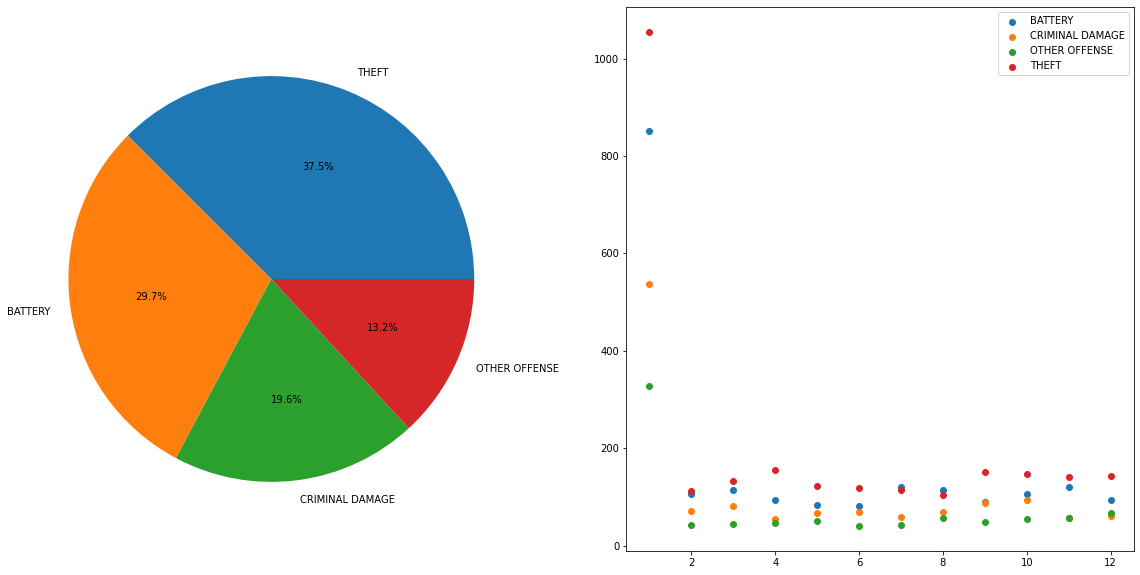

In [74]:
fig, ax = plt.subplots(1,2,figsize=(20,10))
ax[0].pie(vc, labels = vc.index, autopct='%1.1f%%');


for typecrime in num.columns:
  ax[1].scatter(x = num.index, y = num[typecrime], label = typecrime)

ax[1].legend()

num.columns